In [139]:
import ot
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

plt.rcParams['mathtext.fontset'] = 'custom' 
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans' 
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic' 
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold' 
plt.rcParams['font.size'] = 16 
plt.rcParams['mathtext.fontset'] = 'stix' 
plt.rcParams['font.family'] = 'STIXGeneral' 

palette = sns.color_palette('tab10')

In [7]:
data = np.load('../data/digits_dataset.npy')
X = data[:, :-2]
y = data[:, -2]
d = data[:, -1]

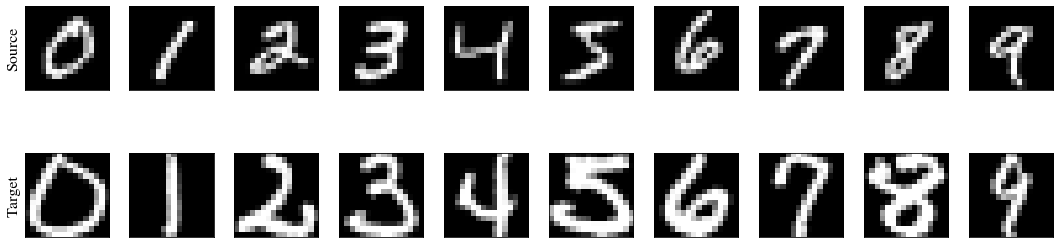

In [115]:
fig, axes = plt.subplots(2, 10, figsize=(15, 5))

for digit in range(10):
    ind_src = np.intersect1d(np.where(d == 1)[0],
                             np.where(y == digit)[0])
    ind_tgt = np.intersect1d(np.where(d == 0)[0],
                             np.where(y == digit)[0])
    
    xsi = X[ind_src[0], :]
    xtj = X[ind_tgt[0], :]
    axes[0, digit].imshow(xsi.reshape(16, 16), cmap='gray')
    axes[0, digit].set_xticks([])
    axes[0, digit].set_yticks([])
    
    axes[1, digit].imshow(xtj.reshape(16, 16), cmap='gray')
    axes[1, digit].set_xticks([])
    axes[1, digit].set_yticks([])
axes[0, 0].set_ylabel('Source')
axes[1, 0].set_ylabel('Target')
    
plt.tight_layout()
plt.savefig('../Figures/OTDA_Digits.svg')

In [87]:
Xs = X[np.where(d == 1)[0]]
ys = y[np.where(d == 1)[0]]
print('Source domain has {} samples'.format(Xs.shape[0]))

Xt = X[np.where(d == 0)[0]]
yt = y[np.where(d == 0)[0]]
print('Target domain has {} samples'.format(Xt.shape[0]))

Source domain has 2500 samples
Target domain has 2500 samples


In [142]:
clf = SVC(kernel='linear', max_iter=1e+6)
clf.fit(Xs, ys)
yp = clf.predict(Xt)

print('[Baseline] Acurracy on target: {}'.format(accuracy_score(yt, yp)))

[Baseline] Acurracy on target: 0.3664


In [133]:
ns = Xs.shape[0]
nt = Xt.shape[0]

a = ot.unif(ns)
b = ot.unif(nt)
M = ot.dist(Xs, Xt)
M = M / np.max(M)
G = ot.sinkhorn(a, b, M, reg=1e-3)

In [143]:
TXs = ns * np.dot(G, Xt)
clf = SVC(kernel='linear', max_iter=1e+6)
clf.fit(TXs, ys)
yp = clf.predict(Xt)

print('[Sinkhorn] Acurracy on target: {}'.format(accuracy_score(yt, yp)))

[Sinkhorn] Acurracy on target: 0.4568


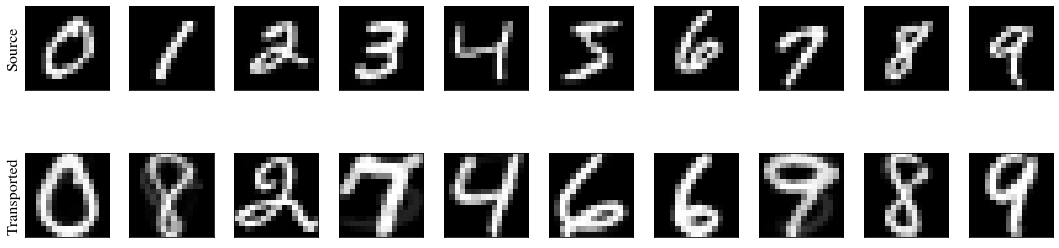

In [144]:
fig, axes = plt.subplots(2, 10, figsize=(15, 5))

for digit in range(10):
    axes[0, digit].imshow(Xs[np.where(ys == digit)[0][0], :].reshape(16, 16), cmap='gray')
    axes[0, digit].set_xticks([])
    axes[0, digit].set_yticks([])
    
    axes[1, digit].imshow(TXs[np.where(ys == digit)[0][0], :].reshape(16, 16), cmap='gray')
    axes[1, digit].set_xticks([])
    axes[1, digit].set_yticks([])
    
axes[0, 0].set_ylabel('Source')
axes[1, 0].set_ylabel('Transported')
plt.tight_layout()
plt.savefig('../Figures/TransportedDigits.svg')